## CFChemDb demo - cheminformatics db and development system
Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/druggablegenome/idg-cfde
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [2]:
dbcon = rdktools.util.db.Connect("localhost", 5432, "cfchemdb", "www", "foobar")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,glygen,33531
0,public,refmet,154676
0,public,idg,251677
0,public,mols,308206
0,public,reprotox,965
0,public,lincs,32469


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,glygen,glycan_type,character varying
1,public,glygen,mass_pme,double precision
2,public,glygen,number_monosaccharides,integer
3,public,glygen,fully_determined,character varying
4,public,glygen,wurcs,character varying
...,...,...,...,...
5,public,lincs,inchi_key,character varying
6,public,lincs,compound_aliases,character varying
7,public,lincs,sig_count,integer
8,public,lincs,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id
0,46227967,OC(=O)C(=O)O.Oc1ccc2C[C@H]3N(CC4CC4)CC[C@@]56[...,3,3,O=C(N[C@@H]1CC[C@@]2(O)[C@H]3Cc4ccc(O)c5c4[C@@...,229264
1,71476627,COc1ccc(OC)c(c1)C2=CC(=O)C(=CC=C2)O,2,2,COc1ccc(OC)c(-c2cccc(O)c(=O)c2)c1,119227
2,68011375,CN1CCc2ccc(NC(=O)c3cccc(CNC(=O)c4cc5ccc(cc5n4C...,1,4,CN1CCc2ccc(NC(=O)c3cccc(CNC(=O)c4cc5ccc(C#N)cc...,252469
3,68688090,O=C(COc1ccccc1)N2CCCC[C@@H]2c3nc(n[nH]3)c4ccc5...,1,1,O=C1COc2ccc(-c3n[nH]c([C@H]4CCCCN4C(=O)COc4ccc...,130428
4,77844860,NC(=O)c1cccc(COc2c(F)c(ccc2C3CCC3)c4cnc(N)cn4)c1,1,2,NC(=O)c1cccc(COc2c(C3CCC3)ccc(-c3cnc(N)cn3)c2F)c1,144992
5,9806986,CCC(N1C=CN=C(NCc2nccs2)C1=O)C(=O)N[C@@H](CC(=O...,4,4,CCC(C(=O)N[C@@H](CC(=O)O)C(=O)CSCc1ccccc1)n1cc...,55062


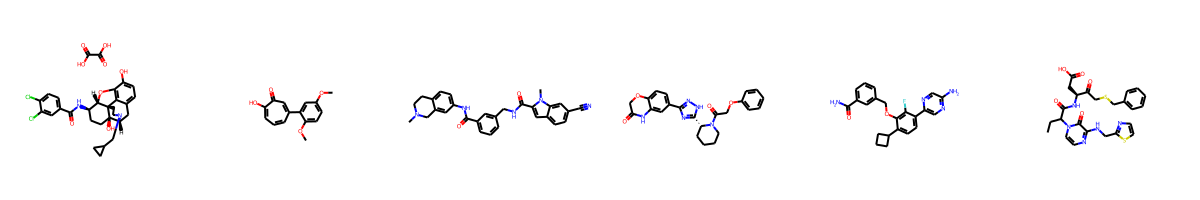

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __LINCS__

In [7]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K87742870,BRD-K87742870,None,None,C[C@H](CO)N1C[C@@H](C)[C@@H](CN(C)S(=O)(=O)c2c...,None,None,1,Cc1ccc(S(=O)(=O)N(C)C[C@H]2Oc3ncc(Br)cc3C(=O)N...,38748
1,BRD-M73564418,BRD-M73564418,None,None,CCN1[C@H]2Cn3c(=O)c(C=CC)ccc3[C@@H]1[C@H](C(=O...,QNYIUHHVJKFROO-CASUZUPASA-N,None,4,CC=Cc1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O)N...,25795
2,BRD-K14229306,SA-1458571,None,None,O[C@H]1COC[C@H]2O[C@H](CC(=O)Nc3ccc(cc3)-c3ccc...,WTHWQCPYZWPYSX-LGTXBLIGSA-N,None,24,O=C(C[C@@H]1CC[C@H]2[C@@H](COC[C@H](O)CN2C(=O)...,44424
3,BRD-K26026745,BRD-K26026745,None,None,CO[C@@H]1CN(C)C(=O)c2cc(NC(=O)C3CCC3)ccc2OC[C@...,None,None,1,CO[C@@H]1CN(C)C(=O)c2cc(NC(=O)C3CCC3)ccc2OC[C@...,38991
4,BRD-K04853698,LDN-193189,"ACVR1, BMPR1A",Serine/threonine kinase inhibitor,C1CN(CCN1)c1ccc(cc1)-c1cnc2c(cnn2c1)-c1ccnc2cc...,CDOVNWNANFFLFJ-UHFFFAOYSA-N,None,300,c1ccc2c(-c3cnn4cc(-c5ccc(N6CCNCC6)cc5)cnc34)cc...,42173
5,BRD-K61520982,BRD-K61520982,None,None,CCCNC(=O)N1C[C@@]2(C1)CN(Cc1ccc(F)cc1)[C@@H](C...,WUJMIKHUVFPYKN-QFIPXVFZSA-N,None,4,CCCNC(=O)N1CC2(C1)CN(Cc1ccc(F)cc1)[C@@H](CO)c1...,25080


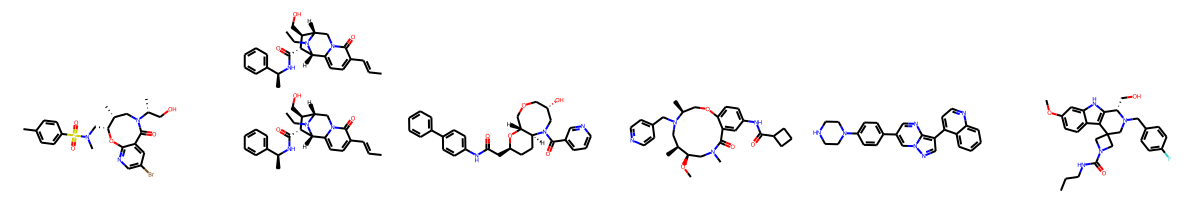

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [9]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,LacCer 14:0;O2/25:0,Sphingolipids,Glycosphingolipids,Hex2Cer,C51H99NO13,933.711644,KPLMDHBIBUNSEA-GSSLFNOQSA-N,CCCCCCCCCCC[C@@H](O)[C@H](CO[C@@H]1O[C@H](CO)[...,145717052,CCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@@H]1...,22529
1,Adiantifoline,Alkaloids,Aromatic heteropolycyclic compounds,Aporphines,C42H50N2O9,726.351633,UEKRHVIBSZVFQN-KYJUHHDHSA-N,CN1CCc2cc(OC)c(cc2[C@@H]1Cc1cc(OC)c(cc1Oc1cc2C...,167937,COc1cc(C[C@H]2c3cc(OC)c(OC)cc3CCN2C)c(Oc2cc3c(...,3948
2,Ethanethioic S-acid,Organic acids,Carbothioic S-acids,Carbothioic S-acids,C2H4OS,75.998285,DUYAAUVXQSMXQP-UHFFFAOYSA-N,CC(=O)S,10484,CC(=O)S,15077
3,Benzenediazonium,Benzenoids,Benzenes,Benzenes,C6H5N2,105.045273,CIZVQWNPBGYCGK-UHFFFAOYSA-N,N#[N+]c1ccccc1,9718,N#[N+]c1ccccc1,4181
4,Gln-Ser-Asn,Organic acids,Amino acids and peptides,Tripeptides,C12H21N5O7,347.1441,OKARHJKJTKFQBM-ACZMJKKPSA-N,N[C@@H](CCC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C@@H](...,145455197,NC(=O)CC[C@H](N)C(=O)N[C@@H](CO)C(=O)N[C@@H](C...,12528
5,Aleprolic acid,Fatty Acyls,Fatty acids,Carbocyclic FA,C6H8O2,112.05243,MOMBAXHNIPLMSI-UHFFFAOYSA-N,OC(=O)C1CCC=C1,549171,O=C(O)C1C=CCC1,5810


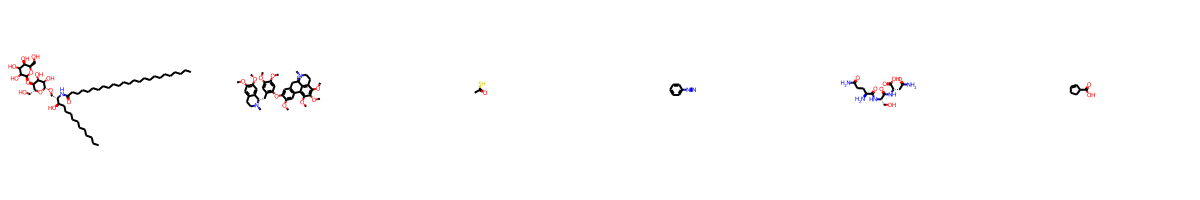

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [11]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,902.48,3,yes,"WURCS=2.0/3,3,2/[h2112h_2*NCC/3=O][a2112h-1b_1...",Hex(1)HexNAc(1)NeuGc(1)aldi(1) % 692.24874214,G11263YZ,0,nan,InChI=1S/C25H44N2O20/c1-8(32)26-9(3-28)21(46-2...,...,CC(=O)N[C@@H](CO)[C@H]([C@H]([C@@H](CO[C@@]1(C...,692.25,30301,IGWDRGIHPQKXFZ-OGCQUWDZSA-N,G11263YZ,91849782.0,252281492.0,147525.0,CC(=O)N[C@@H](CO)[C@@H](O[C@@H]1O[C@H](CO)[C@H...,307082
1,Saccharide,1090.55,4,nan,"WURCS=2.0/4,4,3/[a2122h-1x_1-5][a2112h-1b_1-5]...",Hex(2)HexNAc(1)NeuGc(1) % 852.28591557,G18221CF,174,nan,InChI=1S/C31H52N2O25/c1-8(39)32-16-19(45)18(44...,...,CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@H]1O[C@H]2...,852.29,22945,UVJCVYUZPCGWTB-HKHIQPODSA-N,G18221CF,14647415.0,252279663.0,147861.0,CC(=O)N[C@H]1[C@H](O[C@H]2[C@@H](CO)O[C@@H](O[...,306529
2,Saccharide,2047.05,9,yes,"WURCS=2.0/3,9,8/[a2122h-1b_1-5_2*NCC/3=O][a112...",Hex(5)HexNAc(4) % 1640.59217262,G38590XT,0,DGalpb1-4DGlcpNAcb1-2DManpa1-3[DGalpb1-4DGlcpN...,InChI=1S/C62H104N4O46/c1-14(75)63-27-36(84)47(...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O...,1640.59,9492,GRHWEVYJIHXESA-PNWIWHAPSA-N,G38590XT,91856732.0,252289808.0,150314.0,CC(=O)N[C@H]1[C@H](O[C@@H]2[C@@H](OC[C@H]3O[C@...,304909
3,Saccharide,658.34,3,yes,"WURCS=2.0/2,3,2/[a2112h-1b_1-5][a2122h-1b_1-5]...",Hex(3) % 504.1690352,G87711HP,0,DGlcpb1-2[DGlcpb1-3]DGalpb1-OH,InChI=1S/C18H32O16/c19-1-4-7(22)10(25)12(27)17...,...,C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)O)O[C@H...,504.17,27457,DABDWRSEVCYJAY-SJHQVKSISA-N,G87711HP,91856360.0,252289364.0,145640.0,OC[C@H]1O[C@@H](O[C@H]2[C@@H](O)[C@@H](CO)O[C@...,299714
4,Saccharide,740.39,3,nan,"WURCS=2.0/3,3,2/[a2122h-1x_1-5_2*NCC/3=O][a212...",Hex(1)HexNAc(2) % 586.22213341,G55492PI,233,nan,InChI=1S/C22H38N2O16/c1-6(28)23-11-15(32)18(10...,...,CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O[C@@H...,586.22,1449,RDDKDHBHNMFTRT-DXUKHROXSA-N,G55492PI,91848070.0,252279482.0,151313.0,CC(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O[C@@H]2O[C@...,298892
5,Saccharide,658.34,3,yes,"WURCS=2.0/1,3,2/[a2112h-1b_1-5]/1-1-1/a2-b1_b2-c1",Hex(3) % 504.1690352,G00153LJ,0,DGalpb1-2DGalpb1-2DGalpb1-OH,InChI=1S/C18H32O16/c19-1-4-8(23)11(26)14(16(29...,...,C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)O)O[C@H...,504.17,7604,UQBIAGWOJDEOMN-CXMBNTHTSA-N,G00153LJ,91852608.0,252284869.0,146058.0,OC[C@H]1O[C@@H](O[C@H]2[C@H](O[C@@H]3[C@@H](O)...,301054


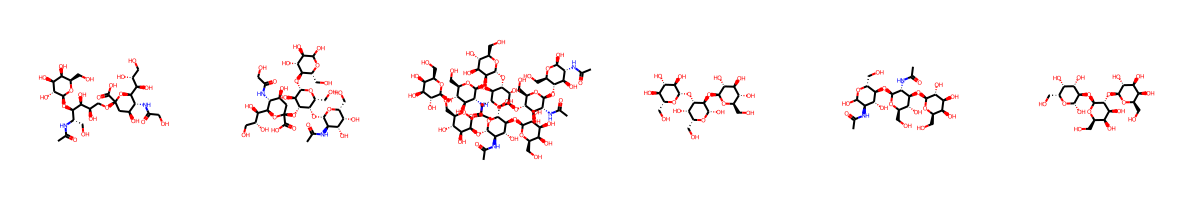

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [13]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-44651,1910-42-5,16218602,O.[Cl-].[Cl-].C[n+]1ccc(cc1)-c1cc[n+](C)cc1,CV,C[n+]1ccc(-c2cc[n+](C)cc2)cc1.O.[Cl-].[Cl-],298189
1,LS-3229,7646-85-7,5727,Cl[Zn]Cl,Blood,Cl[Zn]Cl,298512
2,LS-574,115-29-7,3224,ClC1=C(Cl)C2(Cl)C3COS(=O)OCC3C1(Cl)C2(Cl)Cl,CNS,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,18808
3,LS-1858,86386-73-4,3365,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,CNS,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,4784
4,LS-1849,85-68-7,2347,CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1,Blood,CCCCOC(=O)c1ccccc1C(=O)OCc1ccccc1,4529
5,LS-118466,50-02-2,9782,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,Blood,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,32555


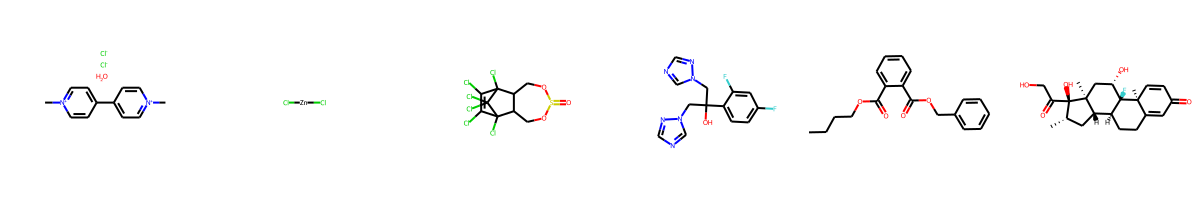

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [15]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,NCCc1ccc(O)c(O)c1,None,1.000000
1,Cl.NCCc1ccc(O)c(O)c1,None,1.000000
2,NCCc1cc(O)c(O)c(O)c1,None,0.921986
3,NCCc1cccc(O)c1,None,0.853846
4,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
5,OCCc1ccc(O)c(O)c1,None,0.784722
6,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
7,NCCc1cc(O)c(O)cc1O,None,0.778443
8,O=CCc1ccc(O)c(O)c1,None,0.773973
9,COc1cc(CCN)ccc1O,None,0.773810


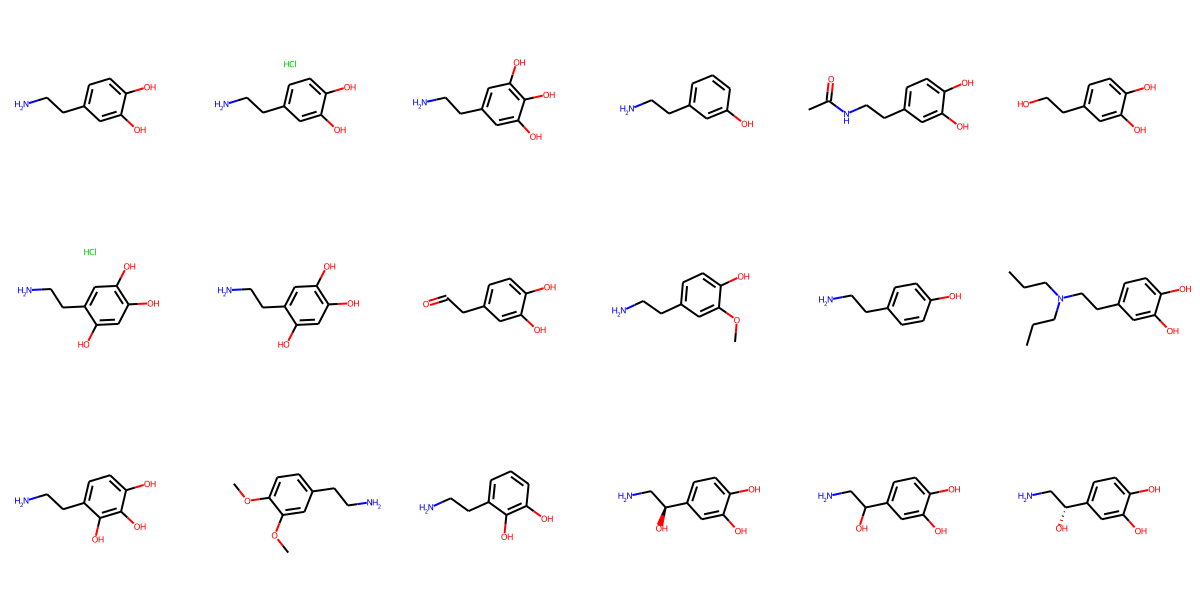

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)